# Importing the required data

- upload merged unemployment_vacancies2015.csv to 'data' in project
- upload shapefiles to 'data': .shp .cpg .dbf .prj .shx (from https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london)
- upload population (density) csv table into  from https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough

In [1]:
#setup data folder (it probably already exists)
!mkdir data

mkdir: cannot create directory ‘data’: File exists


# Prepare for mapping
- download tools and libraries

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
import matplotlib

%matplotlib inline

In [5]:
#setup environment
!pip install geopandas

     |████████████████████████████████| 921kB 94kB/s  eta 0:00:01
     |████████████████████████████████| 1.5MB 42kB/s  eta 0:00:01
     |████████████████████████████████| 11.8MB 7.8kB/s eta 0:00:01     |█████████████████████████████▋  | 10.9MB 690kB/s eta 0:00:02
     |████████████████████████████████| 10.1MB 7.1kB/s ta 0:00:01     |████████████                    | 3.8MB 3.5MB/s eta 0:00:02


In [6]:
import geopandas as gp

In [7]:
!pip install pysal==2.0.0

     |████████████████████████████████| 25.0MB 15kB/s  eta 0:00:01
     |████████████████████████████████| 112kB 5.1MB/s eta 0:00:01
  Created wheel for pysal: filename=pysal-2.0.0-cp36-none-any.whl size=25233954 sha256=337c460c8e3843f04e97ad52a3e414495be6732dfd45198ff2616d71fd23ed39
  Stored in directory: /home/nbuser/.cache/pip/wheels/ca/b9/69/49a64348ddb1feaf76b426c81c1db7275cfabacd8bf4ccd778
Successfully built pysal


In [8]:
!pip install descartes

In [9]:
import descartes

In [10]:
import pylab

pylab.rcParams['figure.figsize'] = (20., 16.)

# Look at data

In [11]:
#shapefiles
data_path = "./data/London_Borough_Excluding_MHW.shp"
londonBoroughs = gp.read_file(data_path)

londonBoroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


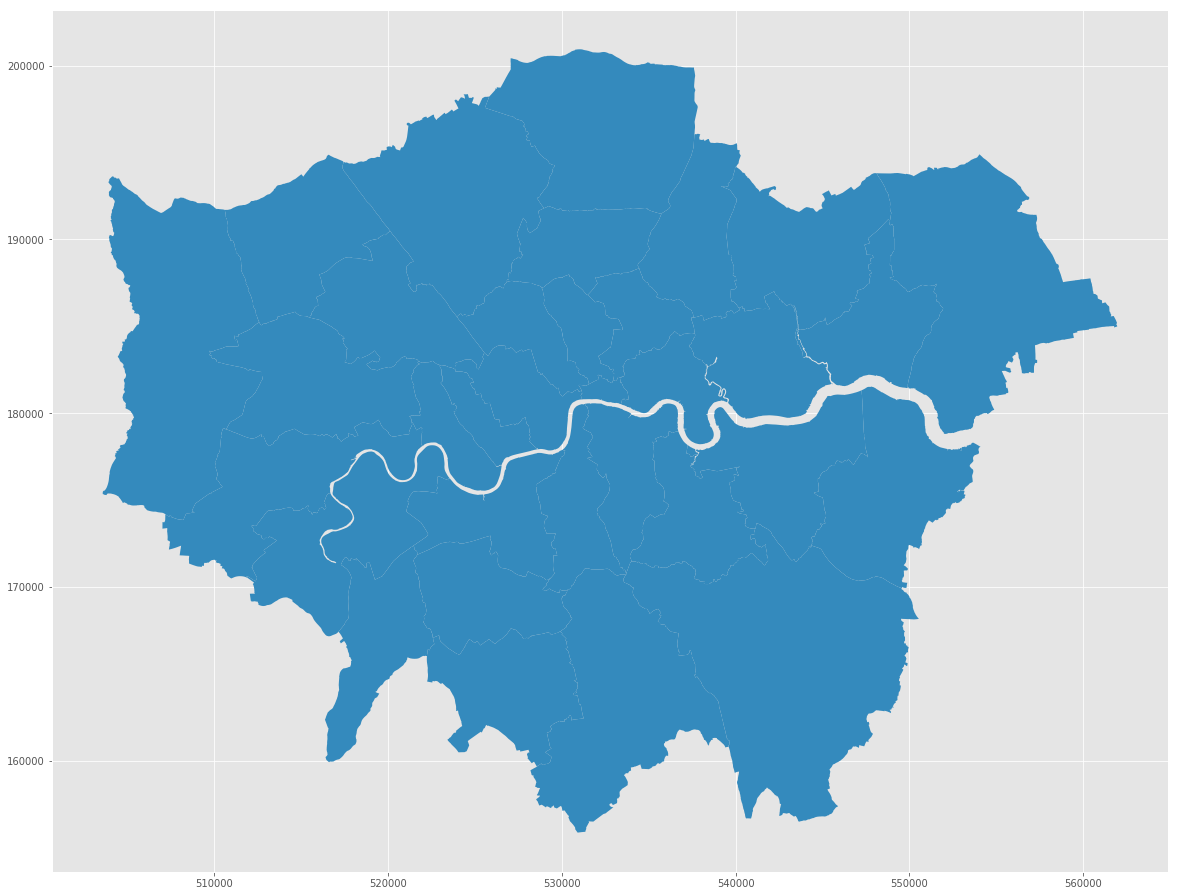

In [12]:
#checking how it looks
londonBoroughs.plot()

In [13]:
#unemployment
data_path = "~/library/data/processed/unemployment_vacancies2015.csv" #use csv file
jobs = pd.read_csv(data_path)

jobs.head()

,Unnamed: 0,year,area,code,active_enterprises,births,birth_rate,deaths,death_rate,number_of_jobs,job_density,unemployment_rate,vacancies,hard-to-fill_vacancies,skills-shortage_vacancies
0,0,2015,Barking and Dagenham,E09000002,6560,1665,25.4,765,11.7,62000,0.48,9.7,1627.0,522.0,404.0
1,1,2015,Barnet,E09000003,26190,4460,17.0,3410,13.0,168000,0.68,5.8,5011.0,1488.0,1284.0
2,2,2015,Bexley,E09000004,9075,1605,17.7,945,10.4,86000,0.57,6.0,4197.0,832.0,586.0
3,3,2015,Brent,E09000005,15745,2895,18.4,1800,11.4,136000,0.62,7.1,5702.0,1841.0,1394.0
4,4,2015,Bromley,E09000006,15695,2340,14.9,1620,10.3,124000,0.61,4.9,4947.0,1673.0,532.0


In [20]:
#population
#data_path = "~/library/data/housing-density-borough.csv"
#pop_density = pd.read_csv(data_path)

#pop_density.head()

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1


# Creating new category: Vacancies/Unemployed

In [21]:
#simplifying population dataset
#pop_density.drop('Inland_Area _Hectares', axis=1, inplace=True)
#pop_density.drop('Total_Area_Hectares', axis=1, inplace=True) 
#pop_density.drop('Population_per_square_kilometre', axis=1, inplace=True)
#pop_density.drop('Square_Kilometres', axis=1, inplace=True)
#pop_density.rename(columns={'Year':'Pop_Year'}, inplace=True)
#pop_density.rename(columns={'Source':'Pop_Source'}, inplace=True)

#pop_density.head()

,Code,Name,Pop_Year,Pop_Source,Population,Population_per_hectare
0,E09000001,City of London,1999,ONS MYE,6581,22.7
1,E09000001,City of London,2000,ONS MYE,7014,24.2
2,E09000001,City of London,2001,ONS MYE,7359,25.3
3,E09000001,City of London,2002,ONS MYE,7280,25.1
4,E09000001,City of London,2003,ONS MYE,7115,24.5


In [42]:
#type(pop_density.Pop_Year)

pandas.core.series.Series

In [57]:
#selecting only data for 2014 population
#pop_2015 = pop_density[pop_density['Pop_Year']==2015]
#pop_2015.head()

,Code,Name,Pop_Year,Pop_Source,Population,Population_per_hectare
15,E09000001,City of London,2014,GLA Population Projections,6872,23.7
67,E09000002,Barking and Dagenham,2014,GLA Population Projections,198683,55.0
119,E09000003,Barnet,2014,GLA Population Projections,375030,43.2
171,E09000004,Bexley,2014,GLA Population Projections,240093,39.6
223,E09000005,Brent,2014,GLA Population Projections,321601,74.4


In [59]:
#merging Population estimates on energy dataset for 2014
#pop_jobs = jobs.merge(pop_2015, left_on='Code', right_on='Code')
#pop_jobs.head()

,Unnamed: 0,Code,Area,Year,Fuel,Sector,Measurement,Value,Name,Pop_Year,Pop_Source,Population,Population_per_hectare
0,22137,E09000002,Barking and Dagenham,2014,All fuels,Total,GWh,2356.585749,Barking and Dagenham,2014,GLA Population Projections,198683,55.0
1,22138,E09000003,Barnet,2014,All fuels,Total,GWh,5462.567411,Barnet,2014,GLA Population Projections,375030,43.2
2,22139,E09000004,Bexley,2014,All fuels,Total,GWh,3793.10978,Bexley,2014,GLA Population Projections,240093,39.6
3,22140,E09000005,Brent,2014,All fuels,Total,GWh,4329.26916,Brent,2014,GLA Population Projections,321601,74.4
4,22141,E09000006,Bromley,2014,All fuels,Total,GWh,4612.198592,Bromley,2014,GLA Population Projections,321834,21.4


In [60]:
#simplify pop_energy
#pop_jobs.drop('Name', axis=1, inplace=True)
#pop_jobs.drop('Pop_Year', axis=1, inplace=True)
#pop_jobs.head()

,Unnamed: 0,Code,Year,Sector,GWh,Name,Pop_Source,Population,Population_per_hectare
0,22137,E09000002,2014,Total,2356.585749,Barking and Dagenham,GLA Population Projections,198683,55.0
1,22138,E09000003,2014,Total,5462.567411,Barnet,GLA Population Projections,375030,43.2
2,22139,E09000004,2014,Total,3793.10978,Bexley,GLA Population Projections,240093,39.6
3,22140,E09000005,2014,Total,4329.26916,Brent,GLA Population Projections,321601,74.4
4,22141,E09000006,2014,Total,4612.198592,Bromley,GLA Population Projections,321834,21.4


In [74]:
#pop_jobs['GWh'] = pop_energy['GWh'].astype('float')

In [77]:
#pop_jobs['Population'] = pop_energy['Population'].astype('float')

In [78]:
#pop_jobs.head()

,Unnamed: 0,Code,Year,Sector,GWh,Name,Pop_Source,Population,Population_per_hectare
0,22137,E09000002,2014,Total,2356.585749,Barking and Dagenham,GLA Population Projections,198683.0,55.0
1,22138,E09000003,2014,Total,5462.567411,Barnet,GLA Population Projections,375030.0,43.2
2,22139,E09000004,2014,Total,3793.109780,Bexley,GLA Population Projections,240093.0,39.6
3,22140,E09000005,2014,Total,4329.269160,Brent,GLA Population Projections,321601.0,74.4
4,22141,E09000006,2014,Total,4612.198592,Bromley,GLA Population Projections,321834.0,21.4


In [79]:
#vacancies per unemployed (requires absulute values!)
jobs['vacancies/unemployed'] = pop_energy['vacancies']/pop_energy['unemployment']
jobs.head()

,Unnamed: 0,Code,Year,Sector,GWh,Name,Pop_Source,Population,Population_per_hectare,GWh/Resident
0,22137,E09000002,2014,Total,2356.585749,Barking and Dagenham,GLA Population Projections,198683.0,55.0,0.011861
1,22138,E09000003,2014,Total,5462.567411,Barnet,GLA Population Projections,375030.0,43.2,0.014566
2,22139,E09000004,2014,Total,3793.109780,Bexley,GLA Population Projections,240093.0,39.6,0.015799
3,22140,E09000005,2014,Total,4329.269160,Brent,GLA Population Projections,321601.0,74.4,0.013462
4,22141,E09000006,2014,Total,4612.198592,Bromley,GLA Population Projections,321834.0,21.4,0.014331


# Merging dataframe on geodataframe

In [14]:
geojobs = londonBoroughs.merge(jobs, left_on='GSS_CODE', right_on='code')
            #geodataframe       #dataframe

In [15]:
geojobs

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Unnamed: 0,year,...,births,birth_rate,deaths,death_rate,number_of_jobs,job_density,unemployment_rate,vacancies,hard-to-fill_vacancies,skills-shortage_vacancies
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",19,2015,...,1370,15.3,890,9.9,95000,0.82,4.9,2033.0,727.0,304.0
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",6,2015,...,2695,17.3,1785,11.5,144000,0.58,5.3,4444.0,1683.0,1043.0
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",4,2015,...,2340,14.9,1620,10.3,124000,0.61,4.9,4947.0,1673.0,532.0
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",16,2015,...,2525,18.2,1565,11.3,187000,1.04,5.1,6429.0,1389.0,1003.0
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",7,2015,...,3420,18.3,2065,11.0,163000,0.71,6.1,7009.0,1768.0,1462.0
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.9 181459.8, 549894.6 181465.7...",14,2015,...,1720,17.0,1085,10.7,93000,0.60,6.0,2621.0,637.0,474.0
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510615.2 191591.3...",15,2015,...,2310,17.1,1450,10.7,202000,1.04,5.8,8359.0,1715.0,1323.0
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510660 191690.9, ...",13,2015,...,2605,17.2,1805,11.9,88000,0.55,4.5,1920.0,427.0,288.0
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201 182512.6, 525181.5 182521.1, ...",3,2015,...,2895,18.4,1800,11.4,136000,0.62,7.1,5702.0,1841.0,1394.0
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.9 198355.2, 524594.3 198321.4...",1,2015,...,4460,17.0,3410,13.0,168000,0.68,5.8,5011.0,1488.0,1284.0


In [16]:
type(geojobs)

geopandas.geodataframe.GeoDataFrame

In [17]:
geojobs['unemployment_rate']

0     4.9
1     5.3
2     4.9
3     5.1
4     6.1
5     6.0
6     5.8
7     4.5
8     7.1
9     5.8
10    6.1
11    6.7
12    6.2
13    6.8
14    6.0
15    5.9
16    6.5
17    5.9
18    5.3
19    4.3
20    4.7
21    5.0
22    6.1
23    5.1
24    6.3
25    5.5
26    7.6
27    6.4
28    6.7
29    6.7
30    7.5
31    9.7
Name: unemployment_rate, dtype: float64

In [83]:
#optionally saving to csv file
#data_path = "~/library/data/borough_capita_energy_2015.csv"

#geoenergy.to_csv(data_path)

ValueError: setting an array element with a sequence

# Creating Choropleth Map with Legend

In [18]:
original_crs = geojobs.crs
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_geojobs = geojobs.to_crs(crs=target_crs)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [19]:
import numpy as np
import matplotlib

In [20]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = matplotlib.pyplot.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in range(N+1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

In [21]:
from pysal.viz.mapclassify import Quantiles

In [22]:
breaks = Quantiles(
    geojobs['unemployment_rate'].values,
    k=5)
print(breaks)

              Quantiles              
 
Lower          Upper            Count
        x[i] <= 5.100               8
5.100 < x[i] <= 5.840               5
5.840 < x[i] <= 6.100               7
6.100 < x[i] <= 6.700               7
6.700 < x[i] <= 9.700               5


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [23]:
bar_labels = ['<=%i'% b for b in breaks.bins]
print(bar_labels)

['<=5', '<=5', '<=6', '<=6', '<=9']


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:96: UserWarning: Warning: setting k to 29
  Warn('Warning: setting k to %d' % k_q, UserWarning)


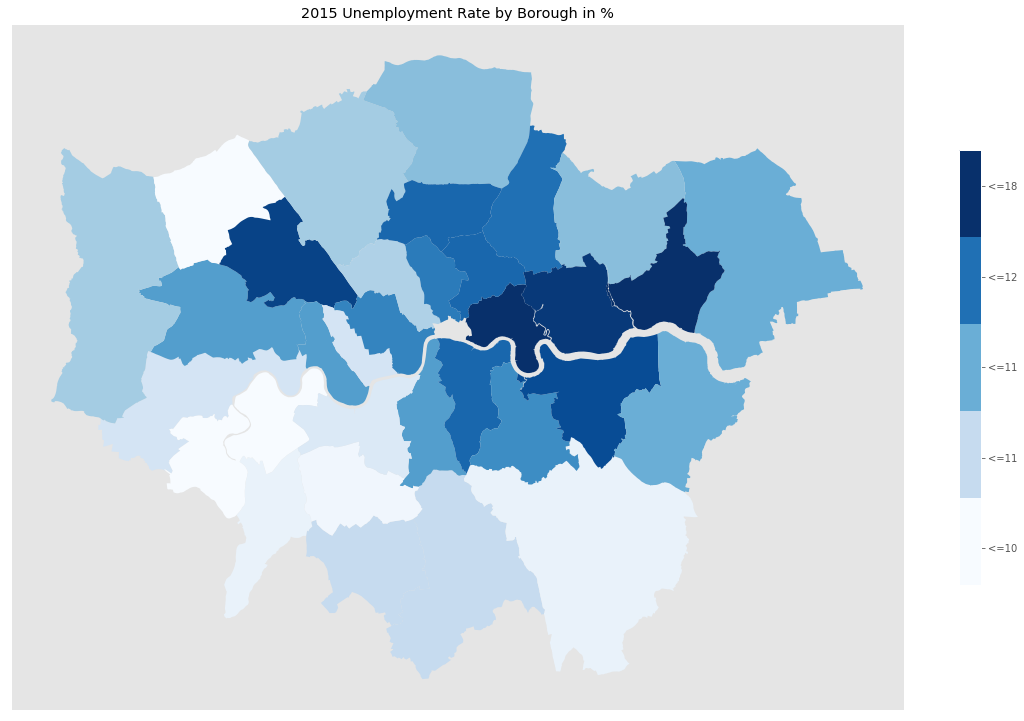

In [32]:
projected_geojobs.plot(column='unemployment_rate', cmap='Blues', scheme='quantiles', k=30)
plt.title('2015 Unemployment Rate by Borough in %')
plt.xticks([])
plt.yticks([])
plt.savefig('./data/Unemployment.png')

cmap = plt.get_cmap('Blues')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)

In [27]:
breaks = Quantiles(
    geojobs['death_rate'].values,
    k=5)
print(breaks)

               Quantiles               
 
Lower            Upper            Count
         x[i] <= 10.720               7
10.720 < x[i] <= 11.340               6
11.340 < x[i] <= 11.700               7
11.700 < x[i] <= 12.480               5
12.480 < x[i] <= 18.500               7


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [28]:
bar_labels = ['<=%i'% b for b in breaks.bins]
print(bar_labels)

['<=10', '<=11', '<=11', '<=12', '<=18']


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:96: UserWarning: Warning: setting k to 29
  Warn('Warning: setting k to %d' % k_q, UserWarning)


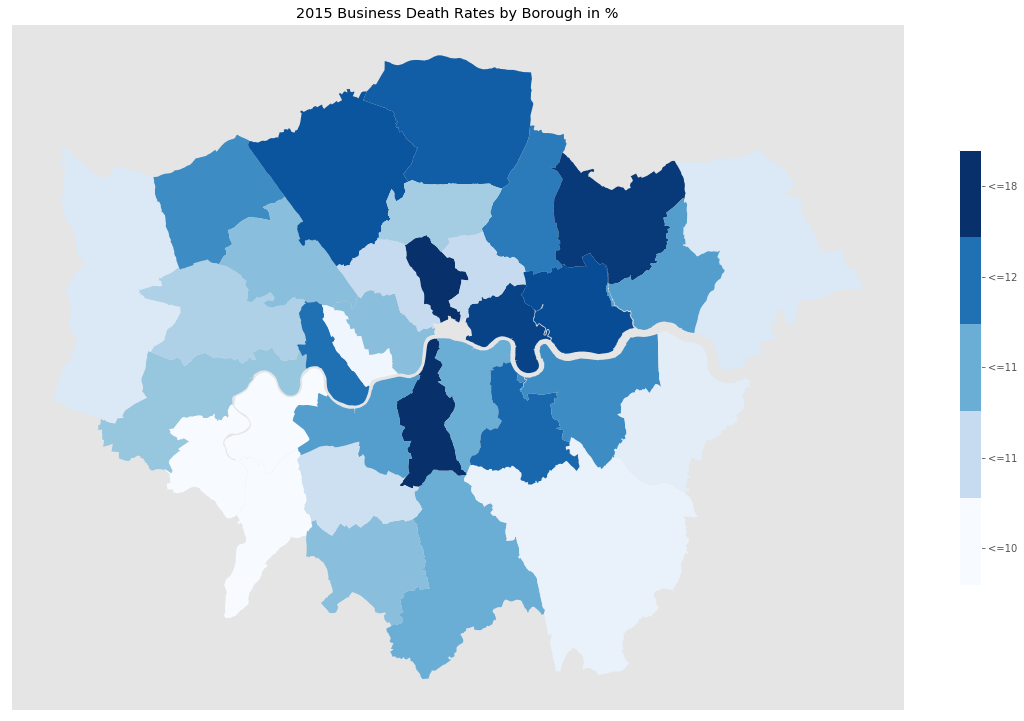

In [31]:
projected_geojobs.plot(column='death_rate', cmap='Blues', scheme='quantiles', k=30)
plt.title('2015 Business Death Rates by Borough in %')
plt.xticks([])
plt.yticks([])
plt.savefig('./data/BusinessDeaths.png')

cmap = plt.get_cmap('Blues')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)

In [132]:
breaks = Quantiles(
    geoenergy['vacancies/unemployment'].values,
    k=5)
print(breaks)

                    Quantiles                    
 
   Lower                Upper               Count
              x[i] <=  580232.119               7
 580232.119 < x[i] <=  697572.213               6
 697572.213 < x[i] <= 1002659.296               7
1002659.296 < x[i] <= 1643901.260               6
1643901.260 < x[i] <= 9542962.933               7


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [133]:
bar_labels = ['<=%i'% b for b in breaks.bins]
print(bar_labels)

['<=580232', '<=697572', '<=1002659', '<=1643901', '<=9542962']


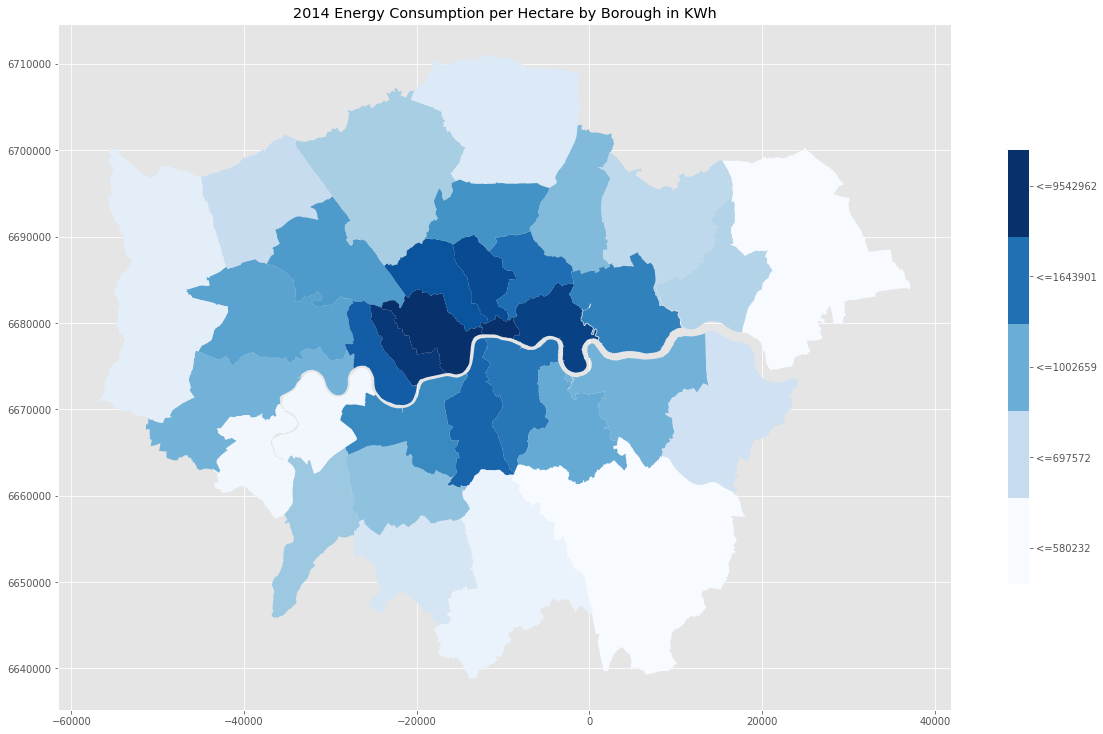

In [134]:
projected_geoenergy.plot(column='vacancies/unemployment', cmap='Blues', scheme='quantiles', k=30)
plt.title('2015 Vacancies per Unemployment by Borough')
plt.xticks([])
plt.yticks([])
plt.savefig('./data/VacanciesUnemployment.png')

cmap = plt.get_cmap('Blues')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)